## PCA

In [35]:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

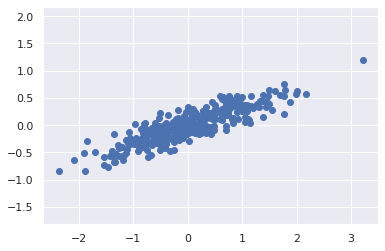

In [36]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 350)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # liczba "komponentów" jest taka sama jak wymiar danych, pozwala to znalezc "główne" osi w danych
pca.fit(X)

PCA(n_components=2)

In [38]:
pca

PCA(n_components=2)

In [39]:
print(pca.components_) # określają kierunek wektorów


[[ 0.94739038  0.3200804 ]
 [-0.3200804   0.94739038]]


In [40]:
print(pca.explained_variance_) #określają długość^2 wektorów, czyli jak waże są poszczególne osie


[0.74757538 0.02065518]


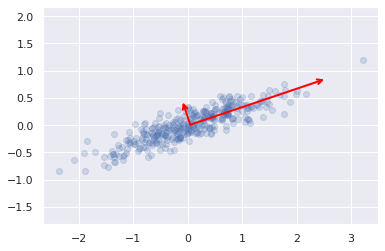

In [41]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0, color="red")
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

## Redukcja wymiarów

### Zadanie 1 (1 p)

spróbuj wykorzystać PCA do redukcji wymiarów powyższych danych. 

 - Ustaw liczbę komponentów na 1 (redukujemy z 2)
 - wykonaj transformację punktów (metoda transform na wytrenowanym modelu) i zapisz je jako nowe
 - sprawdz czy otrzymano odpowiedni rozmiar danych (shape)
 - wyświetl na wykresie nowe punkty oraz dla porównania oryginalne

In [42]:
# Ustaw liczbę komponentów na 1 (redukujemy z 2)
pca_1 = PCA(n_components=1)
pca_1.fit(X)

PCA(n_components=1)

In [43]:
# wykonaj transformację punktów (metoda transform na wytrenowanym modelu) i zapisz je jako nowe
new = pca_1.transform(X)

In [44]:
# sprawdz czy otrzymano odpowiedni rozmiar danych
new.shape

(350, 1)

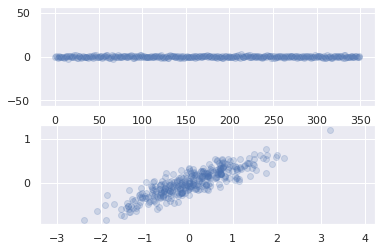

In [45]:
# wyświetl na wykresie nowe punkty oraz dla porównania oryginalne
plt.subplot(2, 1, 1)
plt.plot(new, "o", alpha=0.2)
plt.axis('equal');

plt.subplot(2, 1, 2)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.axis('equal');

Wizualizacja danych rzeczywistych

In [46]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [47]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

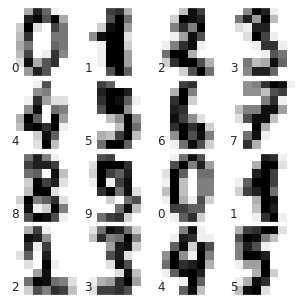

In [48]:
# set up the figure
fig = plt.figure(figsize=(4, 4))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [49]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


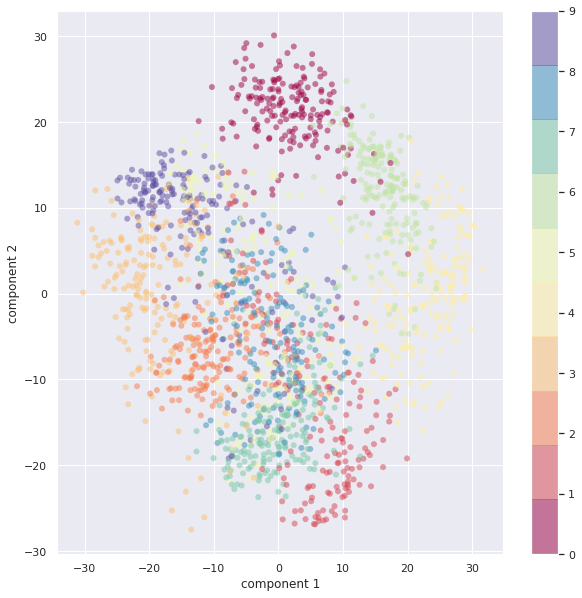

In [50]:
fig = plt.figure(figsize=(10, 10))  # figure size in inches

plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

## K srednich

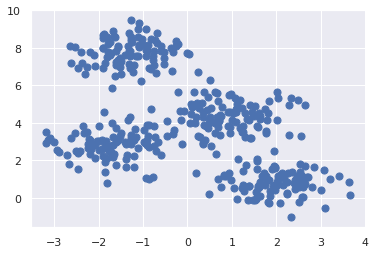

In [51]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.70, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [52]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [53]:
y_kmeans

array([0, 3, 3, 0, 3, 1, 2, 0, 3, 2, 1, 2, 0, 3, 3, 2, 3, 2, 0, 3, 3, 3,
       1, 0, 0, 1, 1, 0, 0, 2, 0, 0, 3, 0, 3, 1, 2, 0, 2, 0, 3, 1, 2, 0,
       2, 1, 2, 2, 2, 1, 1, 1, 3, 1, 1, 3, 0, 2, 2, 3, 2, 2, 2, 2, 0, 3,
       2, 0, 3, 1, 3, 0, 3, 1, 2, 3, 0, 3, 1, 3, 3, 0, 2, 1, 0, 3, 3, 0,
       3, 2, 3, 2, 0, 3, 3, 1, 0, 2, 2, 2, 1, 2, 0, 0, 3, 1, 0, 1, 2, 3,
       3, 3, 0, 3, 1, 2, 1, 3, 1, 1, 2, 3, 2, 1, 0, 1, 2, 2, 2, 0, 1, 1,
       1, 3, 0, 3, 1, 0, 1, 3, 0, 3, 3, 1, 3, 2, 0, 3, 2, 3, 2, 0, 2, 0,
       1, 3, 2, 3, 3, 3, 0, 3, 1, 3, 3, 1, 2, 2, 3, 1, 1, 1, 1, 2, 2, 2,
       0, 3, 0, 1, 0, 1, 3, 0, 1, 3, 1, 0, 0, 1, 0, 0, 1, 3, 1, 1, 1, 2,
       2, 0, 0, 3, 2, 2, 1, 0, 3, 1, 0, 1, 0, 0, 2, 2, 1, 2, 0, 1, 2, 1,
       3, 0, 1, 3, 0, 3, 2, 1, 0, 1, 0, 3, 0, 0, 1, 2, 3, 2, 0, 3, 2, 0,
       0, 1, 2, 0, 1, 0, 2, 3, 3, 2, 3, 0, 1, 1, 0, 0, 2, 1, 0, 3, 3, 3,
       1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 3, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1,
       2, 0, 2, 0, 2, 3, 0, 2, 3, 0, 2, 2, 0, 3, 1,

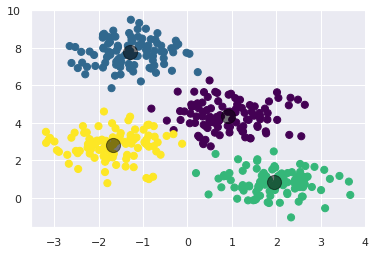

In [54]:
# rysuj z kolorem klasy
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# dodaj centroidy
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [55]:
# ocena klastrowania - współczynnik silhouette im bliżej 1 tym lepsze dopasowanie
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, y_kmeans)
silhouette_avg

0.6264788489488764

Jak wybrać najlepszą liczbę klastrów?
- współcznnik silhuette  dla roznej liczby klastrow
- metoda łokciowa - na podstawie sumy kwadratów odległości  punktów wewnątrz klastrów do centroidów

In [56]:

wcss = [] 
K = range(1, 10)

for i in K: 
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_) #Sum of squared distances of samples to their closest cluster center

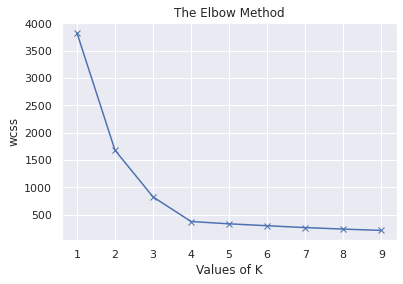

In [57]:
plt.plot(K, wcss, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('wcss')
plt.title('The Elbow Method')
plt.show()

### Zadanie 2 (2p)

Spróbuj pogrupować  dane ze zbioru iris. 

Wybierz odpowiednią liczbę klasrów wykorzystując sumę kwadratów odległości punktów od najbliższych centroidów oraz dodatkowo współczynnik silhuette.

 Jakie są wartości powyższych miat tych  dla wybranej liczby klastrów. Do oceny  wykorzystaj również etykiety iris. 

 Zredukuj dane do 2 wymiarów i zwizualizuj klastry.

In [58]:
# Spróbuj pogrupować dane ze zbioru iris
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
kmeans_iris = KMeans(n_clusters=3)
kmeans_iris.fit(X)
y_kmeans_iris = kmeans_iris.predict(X)

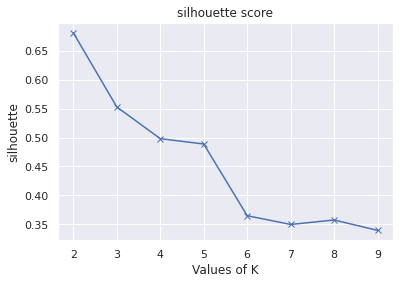

In [59]:
# Wybierz odpowiednią liczbę klastrów wykorzystując sumę kwadratów odległości punktów od najbliższych centroidów oraz dodatkowo współczynnik silhuette.

# silhouette_avg_iris = silhouette_score(X, y_kmeans_iris)
# silhouette_avg_iris
silhouette = []
for i in range(2, 10): 
    kmeans_s = KMeans(n_clusters = i, random_state = 42)
    kmeans_s.fit(X)
    y_kmeans_iris_s = kmeans_s.predict(X)
    silhouette.append(silhouette_score(X, y_kmeans_iris_s))
  
plt.plot(range(2, 10), silhouette, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('silhouette')
plt.title('silhouette score')
plt.show()

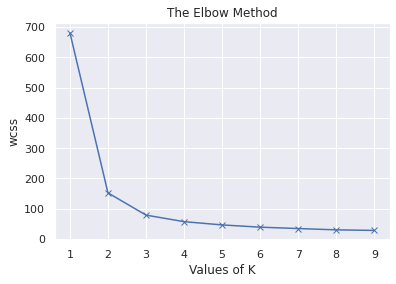

In [60]:
wcss = [] 
K = range(1, 10)

for i in K: 
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)

plt.plot(K, wcss, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('wcss')
plt.title('The Elbow Method')
plt.show()

In [61]:
# Po analizie wygenerowanych wykresów wybór dwóch klastrów wydaje się być najlepszym.

In [62]:
# Zredukuj dane do 2 wymiarów

kmeans_iris_2 = KMeans(n_clusters=2)
kmeans_iris_2.fit(X)
y_kmeans_iris_2 = kmeans_iris_2.predict(X)

In [63]:
# Jakie są wartości powyższych miat tych dla wybranej liczby klastrów?
print("silhouette score: ",silhouette_score(X, y_kmeans_iris_2))
print("suma kwadratów odległości punktów od najbliższych centroidów: ", kmeans_iris_2.inertia_)


silhouette score:  0.6810461692117462
suma kwadratów odległości punktów od najbliższych centroidów:  152.3479517603579


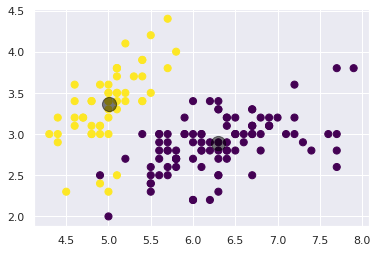

In [64]:
#  i zwizualizuj klastry.
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans_iris_2, s=50, cmap='viridis')
centers = kmeans_iris_2.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);